In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'dataset/Canada.xlsx'
df = pd.read_excel(path, skiprows=20, sheet_name=1, skipfooter=2)
df

In [ ]:
pd.set_option('display.max_columns',None) # optional

In [ ]:
df

In [ ]:
# adding a column
years = list(range(1980,2014))
print(years)

In [ ]:
df[years].sum(axis = 1)

In [ ]:
df['Total'] = df[years].sum(axis=1)
df

In [ ]:
print(df.columns.tolist())

In [ ]:
# Type,Coverage,AREA,REG,DEV
df.drop(columns=['Type','Coverage','AREA','REG','DEV'], inplace = True)

In [ ]:
df

In [ ]:
df.rename(mapper={
    'OdName' : 'Country',
    'AreaName' : 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status',
},axis=1,inplace=True)
df

In [ ]:
# all countries with 'A'
df[df.Country.str.startswith("A")]

In [ ]:
df.query("Country.str.endswith('a')")

In [ ]:
# Countries with imigration less  than 10000
df.query('Total<10000')

In [ ]:
# index -> only works for same dataset, do handle with care in another dataset
df.set_index('Country',inplace=True)

<Axes: >

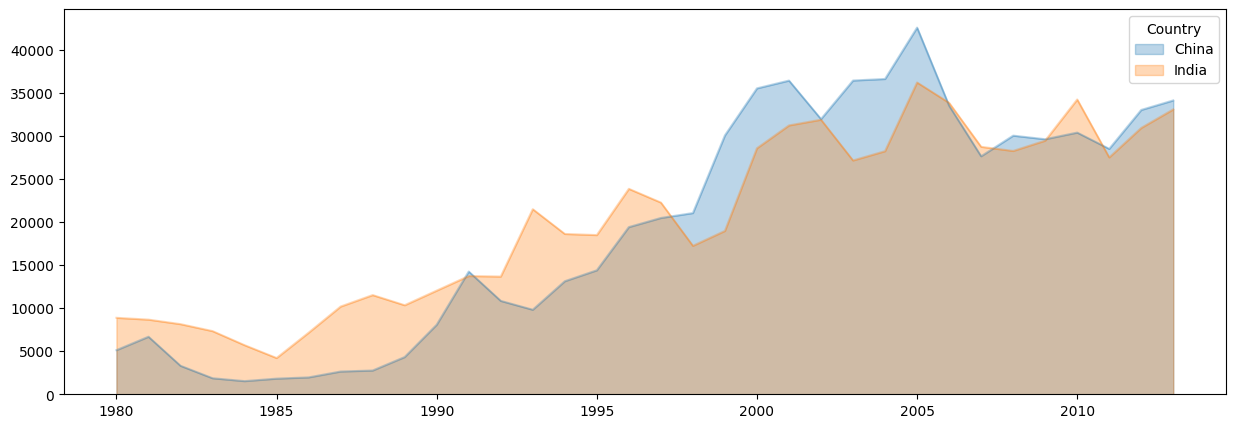

In [51]:
df.loc[['China','India'],years].T.plot(figsize=(15,5),kind='area',
                                       stacked = False,alpha=.3)

Text(0.5, 1.0, 'Half of the Imigrants to Canada are from Asia')

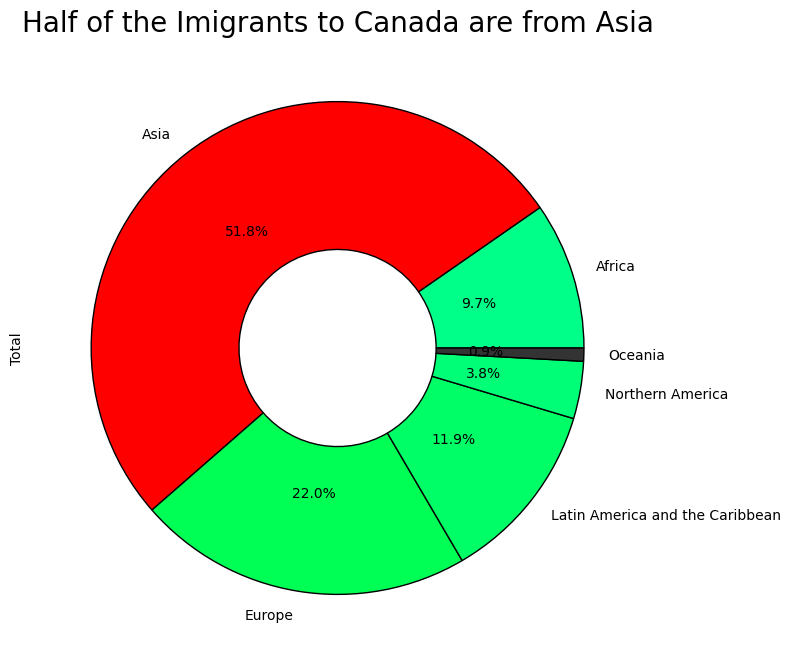

In [68]:
plt.figure(facecolor='white')
colors = ['#0f8','#f00','#0f5','#0f6','#0f7','#333']
df.groupby('Continent')['Total'].sum().plot(kind='pie',autopct='%.1f%%',
                                            colors = colors,
                                            figsize=(8,8),wedgeprops={
                                                'width':.6,
                                                'edgecolor':'black'
                                                })
plt.title(f'Half of the Imigrants to Canada are from Asia',fontsize=20)

In [71]:
print(df.columns.tolist())

['Continent', 'Region', 'Status', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 'Total']


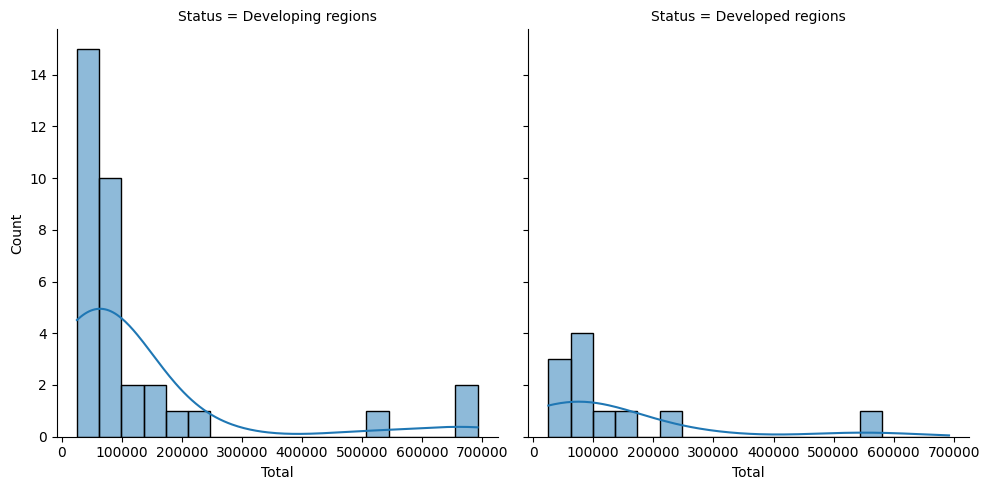

In [70]:
sns.displot(data=df.query('Total>25000'),x='Total',kde=True,col='Status')